In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.modelling_utils as utils
import source.models_classification as modl


In [2]:
# simulate
df, _, _ = dp.simulate_hmm_equity_premium(
    n_samples=2500,
    target="state_t_plus_1",  # forecast next state
    make_features=True,
    vol_windows=(20,60),
    mean_windows=(20,),
    start_date="1850-01-01",
    p_bull_to_bear = 0.03,  # lower -> more persistent bull
    p_bear_to_bull = 0.05,  # bear lasts shorter on avg
)

# choose features (you can add more)


In [88]:
df

,equity_premium,state_true,abs_ret,rv20,rv60,ma20,timestamp
1850-01-01,0.000881,1,0.000881,NaN,NaN,NaN,1850-01-01
1850-02-01,0.015189,1,0.015189,NaN,NaN,NaN,1850-02-01
1850-03-01,0.014790,1,0.014790,NaN,NaN,NaN,1850-03-01
1850-04-01,0.022105,1,0.022105,NaN,NaN,NaN,1850-04-01
1850-05-01,0.006191,1,0.006191,NaN,NaN,NaN,1850-05-01
...,...,...,...,...,...,...,...
2057-12-01,0.011191,1,0.011191,0.021920,0.024088,0.005933,2057-12-01
2058-01-01,0.017205,1,0.017205,0.021116,0.024158,0.007831,2058-01-01
2058-02-01,0.003821,1,0.003821,0.020068,0.023963,0.009050,2058-02-01
2058-03-01,0.020639,1,0.020639,0.020013,0.023963,0.010239,2058-03-01


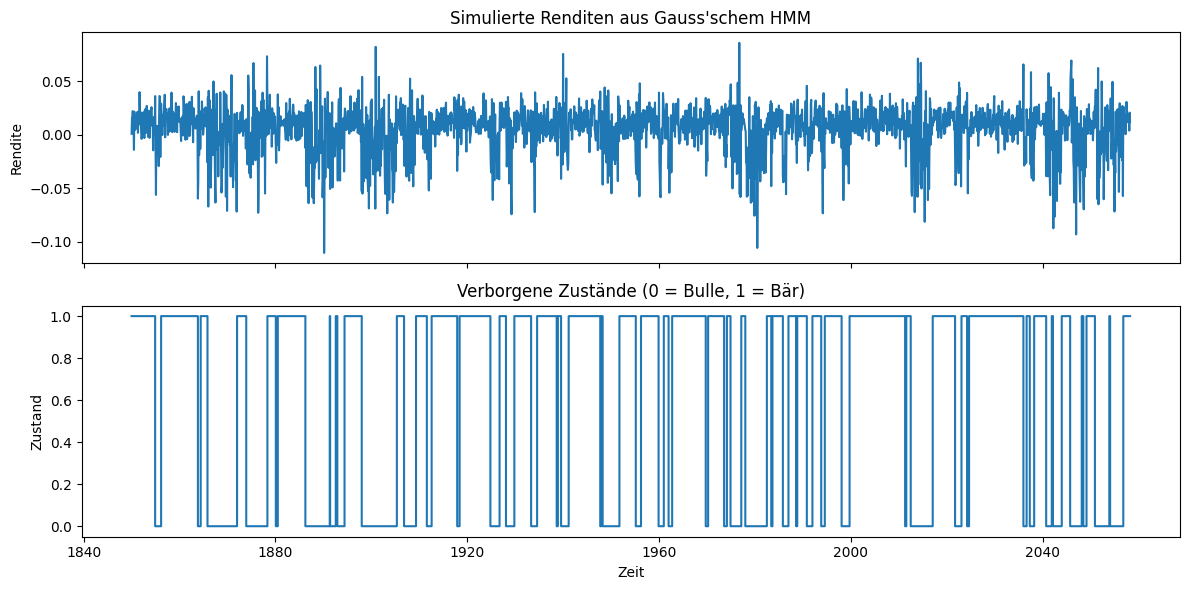

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# (1) Renditen
ax[0].plot(df["timestamp"], df["equity_premium"].values)
ax[0].set_title("Simulierte Renditen aus Gauss'schem HMM")
ax[0].set_ylabel("Rendite")

# (2) Hidden States (0 = Bulle, 1 = Bär)
ax[1].step(df["timestamp"], df["state_true"].values, where="post")
ax[1].set_title("Verborgene Zustände (0 = Bulle, 1 = Bär)")
ax[1].set_xlabel("Zeit")
ax[1].set_ylabel("Zustand")

plt.tight_layout()
plt.show()


In [ ]:
logit_lag_fit_predict = modl.make_logit_multifeature_lag_fit_predict_fn(base_cols = ["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],                # multiple continuous input variables
    target_col = "state_true",
    class_weight={0:5, 1:1})
metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    model_fit_predict_fn=logit_lag_fit_predict,
    start_oos="2007-01-01",
    start_date="1850-01-01",
    baseline_mode = 'persistence'
)
print(metrics)

2007-01-01 00:00:00
2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00
2008-04-01 00:00:00
2008-05-01 00:00:00
2008-06-01 00:00:00
2008-07-01 00:00:00
2008-08-01 00:00:00
2008-09-01 00:00:00
2008-10-01 00:00:00
2008-11-01 00:00:00
2008-12-01 00:00:00
2009-01-01 00:00:00
2009-02-01 00:00:00
2009-03-01 00:00:00
2009-04-01 00:00:00
2009-05-01 00:00:00
2009-06-01 00:00:00
2009-07-01 00:00:00
2009-08-01 00:00:00
2009-09-01 00:00:00
2009-10-01 00:00:00
2009-11-01 00:00:00
2009-12-01 00:00:00
2010-01-01 00:00:00
2010-02-01 00:00:00
2010-03-01 00:00:00
2010-04-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
2010-12-01 00:00:00
2011-01-01 00:00:00
2011-02-01 00:00:00


In [ ]:
plt.hist(y_true)


In [ ]:
plt.hist(y_pred)

In [ ]:
metrics, y_true, y_pred, dates = modl.tabpfn_cls_oos(
    data = df,
    base_cols = base_cols,
    target_col="state_true",
    
    start_oos="2007-01-01",
    start_date="1850-01-01",
    
    n_lags= 1,
    min_train = 120,
    quiet = False,
    model_name = "TabPFN-CLS-lag",
    baseline_mode = "majority",
    model_params=None,           # e.g. "2.5"
)

In [ ]:
from importlib import reload    
reload(modl)
reload(utils)

In [ ]:
# acc, brier, y_t, y_prob, thr_arr, dts, y_hat = modl.moment_cls_oos(
#     data=df,
#     feature_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],
#     target_col="state_true",   # your Bull/Bear label
#     train_first_step_only=True,
#     seq_len=8,
#     start_oos="2055-01-01",
# )

In [ ]:
fit_fn = modl.make_moment_fit_predict_fn(
    feature_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],   # or a list of your channels
    target_col="state_true",
    seq_len=8,
    epochs=30,
    tune_threshold="youden",           # or "majority" or None
    retrain_every=100,
    batch_size=64,
    use_class_weight=True
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=256,                     # recommend >= seq_len
    model_name="MOMENT-CLS",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
)


In [ ]:
plt.hist(y_prob)

In [ ]:
# Example: XGB/GBM lag classifier
fit_fn = modl.make_tree_ensemble_lag_cls_fit_predict_fn(
    base_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],
    target_col="state_true",
    n_lags=6,
    class_weight="balanced",
    model_params={"n_estimators": 500, "max_depth": 3},
    return_proba=False,
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=120,
    model_name="XGB-lag6",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)


In [ ]:
# Example: XGB/GBM lag classifier
fit_fn = modl.make_mlp_lag_cls_fit_predict_fn(
    base_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],
    target_col="state_true",
    n_lags=6,
    retrain_every=5,
    class_weight= True,
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=120,
    model_name="XGB-lag6",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)


In [ ]:
# Example: XGB/GBM lag classifier
fit_fn = modl.make_lstm_seq_cls_fit_predict_fn(
    feature_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],
    target_col="state_true",
    seq_len=24,
    retrain_every=5,
    class_weight= True,
)
#drop columns with nan values 
df = df.dropna()
metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=120,
    model_name="XGB-lag6",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)


In [ ]:
# Example: XGB/GBM lag classifier
fit_fn = modl.make_transformer_seq_cls_fit_predict_fn(
    feature_cols=["equity_premium", "abs_ret", "rv20", "rv60", "ma20"],
    target_col="state_true",
    seq_len=24,
    retrain_every=5,
    class_weight= True,
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    start_date="1850-01-01",
    min_train=120,
    model_name="XGB-lag6",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)


2007-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


[TransformerCls retrain] epoch 1/5 | loss=nan
[TransformerCls retrain] epoch 2/5 | loss=nan
[TransformerCls retrain] epoch 3/5 | loss=nan
[TransformerCls retrain] epoch 4/5 | loss=nan
[TransformerCls retrain] epoch 5/5 | loss=nan
2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


[TransformerCls retrain] epoch 1/5 | loss=nan
[TransformerCls retrain] epoch 2/5 | loss=nan
[TransformerCls retrain] epoch 3/5 | loss=nan
[TransformerCls retrain] epoch 4/5 | loss=nan
[TransformerCls retrain] epoch 5/5 | loss=nan
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


[TransformerCls retrain] epoch 1/5 | loss=nan
[TransformerCls retrain] epoch 2/5 | loss=nan
[TransformerCls retrain] epoch 3/5 | loss=nan
[TransformerCls retrain] epoch 4/5 | loss=nan
[TransformerCls retrain] epoch 5/5 | loss=nan
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


[TransformerCls retrain] epoch 1/5 | loss=nan
[TransformerCls retrain] epoch 2/5 | loss=nan
[TransformerCls retrain] epoch 3/5 | loss=nan
[TransformerCls retrain] epoch 4/5 | loss=nan
[TransformerCls retrain] epoch 5/5 | loss=nan
2008-04-01 00:00:00
2008-05-01 00:00:00
2008-06-01 00:00:00
2008-07-01 00:00:00
2008-08-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


[TransformerCls retrain] epoch 1/5 | loss=nan
[TransformerCls retrain] epoch 2/5 | loss=nan
[TransformerCls retrain] epoch 3/5 | loss=nan
[TransformerCls retrain] epoch 4/5 | loss=nan


KeyboardInterrupt: 

In [ ]:
df["state_true"].value_counts(normalize=True)


state_true
0    0.5636
1    0.4364
Name: proportion, dtype: float64

In [3]:
from importlib import reload
reload(modl)

<module 'source.models_classification' from '/Users/kilianrunnwerth/Masterarbeit/source/models_classification.py'>

In [4]:
fit_fn = modl.make_chronos_t5_cls_fit_predict_fn(
    feature_col="equity_premium",
    target_col="state_true",
    seq_len=75,                  # 128 is fine too, but 64 often enough for returns
    epochs=5,                    # 5 is fine IF we retrain often (incremental)
    retrain_every=2005,            # <--- Update weights every 25 steps
    lr=1e-3,                     # Slightly higher LR for MLP
    model_id="amazon/chronos-t5-small",
    return_proba=False,           # Better for analyzing performance
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    # Ensure start_date gives enough history BEFORE start_oos 
    # so the first training set isn't empty.
    start_date="1850-01-01",
    min_train=200,
    model_name="Chronos-T5-Corrected",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)

2007-01-01 00:00:00
[Chronos] Loading amazon/chronos-t5-small on mps...


'(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 114bb1cf-532b-4239-b34a-734eefbe66fe)')' thrown while requesting HEAD https://huggingface.co/amazon/chronos-t5-small/resolve/main/config.json
Retrying in 1s [Retry 1/5].
Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at amazon/chronos-t5-small and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[Chronos Retrain] Step 1 | Epoch 1/5
[Chronos Retrain] Batch 2 | Loss: 0.6936
[Chronos Retrain] Batch 3 | Loss: 0.6777
[Chronos Retrain] Batch 4 | Loss: 0.5599
[Chronos Retrain] Batch 5 | Loss: 0.5665
[Chronos Retrain] Batch 6 | Loss: 0.6279
[Chronos Retrain] Batch 7 | Loss: 0.4166
[Chronos Retrain] Batch 8 | Loss: 0.5915
[Chronos Retrain] Batch 9 | Loss: 0.6313
[Chronos Retrain] Batch 10 | Loss: 0.3954
[Chronos Retrain] Batch 11 | Loss: 0.5843
[Chronos Retrain] Batch 12 | Loss: 0.4508
[Chronos Retrain] Batch 13 | Loss: 0.4370
[Chronos Retrain] Batch 14 | Loss: 0.5111
[Chronos Retrain] Batch 15 | Loss: 0.5929
[Chronos Retrain] Batch 16 | Loss: 0.2880
[Chronos Retrain] Batch 17 | Loss: 0.4278
[Chronos Retrain] Batch 18 | Loss: 0.6766
[Chronos Retrain] Batch 19 | Loss: 0.3591
[Chronos Retrain] Batch 20 | Loss: 0.4044
[Chronos Retrain] Batch 21 | Loss: 0.3253
[Chronos Retrain] Batch 22 | Loss: 0.3977
[Chronos Retrain] Batch 23 | Loss: 0.3404
[Chronos Retrain] Batch 24 | Loss: 0.2348
[Chro

In [20]:
#[Chronos-T5-Corrected] Valid obs=616 | Acc=0.7906 (baseline=0.6104) | BalAcc=0.7983 (baseline=0.5000) | Skill_Acc=0.4625

from importlib import reload
reload(modl)

<module 'source.models_classification' from '/Users/kilianrunnwerth/Masterarbeit/source/models_classification.py'>

In [31]:

fit_fn = modl.make_chronos_forecast_mlp_cls_fn(
    feature_col="equity_premium",
    target_col="state_true",
    seq_len=100,                  # 128 is fine too, but 64 often enough for returns
    epochs = 5 ,                    # 5 is fine IF we retrain often (incremental)
    retrain_every=500,            # <--- Update weights every 25 steps
    lr=1e-3,                     # Slightly higher LR for MLP
    model_id = "amazon/chronos-bolt-tiny",    
    return_proba=False,           # Better for analyzing performance
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state_true",
    start_oos="2007-01-01",
    # Ensure start_date gives enough history BEFORE start_oos 
    # so the first training set isn't empty.
    start_date="1850-01-01",
    min_train=200,
    model_name="Chronos-T5-Corrected",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)

2007-01-01 00:00:00
[Chronos-MLP] Loading amazon/chronos-bolt-tiny on mps...
2007-02-01 00:00:00
2007-03-01 00:00:00
2007-04-01 00:00:00
2007-05-01 00:00:00
2007-06-01 00:00:00
2007-07-01 00:00:00
2007-08-01 00:00:00
2007-09-01 00:00:00
2007-10-01 00:00:00
2007-11-01 00:00:00
2007-12-01 00:00:00
2008-01-01 00:00:00
2008-02-01 00:00:00
2008-03-01 00:00:00
2008-04-01 00:00:00
2008-05-01 00:00:00
2008-06-01 00:00:00
2008-07-01 00:00:00
2008-08-01 00:00:00
2008-09-01 00:00:00
2008-10-01 00:00:00
2008-11-01 00:00:00
2008-12-01 00:00:00
2009-01-01 00:00:00
2009-02-01 00:00:00
2009-03-01 00:00:00
2009-04-01 00:00:00
2009-05-01 00:00:00
2009-06-01 00:00:00
2009-07-01 00:00:00
2009-08-01 00:00:00
2009-09-01 00:00:00
2009-10-01 00:00:00
2009-11-01 00:00:00
2009-12-01 00:00:00
2010-01-01 00:00:00
2010-02-01 00:00:00
2010-03-01 00:00:00
2010-04-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-08-01 00:00:00
2010-09-01 00:00:00
2010-10-01 00:00:00
2010-11-01 00:00:00
201

In [ ]:
[Chronos-T5-Corrected] Valid obs=616 | Acc=0.6916 (baseline=0.6104) | BalAcc=0.6788 (baseline=0.5000) | Skill_Acc=0.2083


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,